# CIFAR10 Classification Problem

**Exercise objectives**

* 1️ Implement a CNN to solve a **10-class classification problem**

* 2️ Enhance the CNN's performance with **Data Augmentation Techniques**








 From [Wikipedia](https://en.wikipedia.org/wiki/CIFAR-10) (*click on the link for further information*):

> The **CIFAR-10** dataset (Canadian Institute For Advanced Research) is a collection of images that are commonly used to train machine learning and computer vision algorithms. It is one of the most widely used datasets for machine learning research. The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class.

<img src="https://people.minesparis.psl.eu/fabien.moutarde/ES_MachineLearning/mini-projets/cifar10_notebook_fichiers/cifar_10.png">

 This dataset is iconic in the research community as many enhancements for image recognition have been achieved on this dataset. After achieving great performance on this dataset, researchers moved to the more advanced CIFAR-100.

From the [University of Toronto](https://www.cs.toronto.edu/~kriz/cifar.html):

> This dataset is just like the CIFAR-10, except it has 100 classes containing 600 images each. There are 500 training images and 100 testing images per class. The 100 classes in the CIFAR-100 are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs).


 In this notebook, we ***implement a CNN to distinguish the 10 categories from the CIFAR-10 dataset***.



## (1) Loading the CIFAR10 Dataset

In [2]:
from tensorflow.keras.datasets import cifar10
import numpy as np

(images_train, labels_train), (images_test, labels_test) = cifar10.load_data()

labels = ['airplane',
          'automobile',
          'bird',
          'cat',
          'deer',
          'dog',
          'frog',
          'horse',
          'ship',
          'truck']

print(images_train.shape, images_test.shape)
unique, counts = np.unique(labels_train, return_counts=True)
dict(zip(unique, counts))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
(50000, 32, 32, 3) (10000, 32, 32, 3)


{np.uint8(0): np.int64(5000),
 np.uint8(1): np.int64(5000),
 np.uint8(2): np.int64(5000),
 np.uint8(3): np.int64(5000),
 np.uint8(4): np.int64(5000),
 np.uint8(5): np.int64(5000),
 np.uint8(6): np.int64(5000),
 np.uint8(7): np.int64(5000),
 np.uint8(8): np.int64(5000),
 np.uint8(9): np.int64(5000)}

### (1.1) Working on a smaller dataset?

In [3]:
# Considering only 1/10th of the 50_000 images
reduction_factor = 10

# Choosing the random indices of small train set and small test set
idx_train =  np.random.choice(len(images_train), round(len(images_train)/reduction_factor), replace=False)
idx_test =  np.random.choice(len(images_test), round(len(images_test)/reduction_factor), replace=False)

# Collecting the two subsamples images_train_small and images_test_small from images_train and images_test
images_train_small = images_train[idx_train]
images_test_small = images_test[idx_test]
# and their corresponding labels
labels_train_small = labels_train[idx_train]
labels_test_small = labels_test[idx_test]

print("------------------ Before -----------------")
print(images_train.shape, images_test.shape)

print("")

print("--- After applying the reduction factor ---")
print(images_train_small.shape, images_test_small.shape)

print("")
print("-"*43)

unique, counts = np.unique(labels_train_small, return_counts=True)
dict(zip(unique, counts))

------------------ Before -----------------
(50000, 32, 32, 3) (10000, 32, 32, 3)

--- After applying the reduction factor ---
(5000, 32, 32, 3) (1000, 32, 32, 3)

-------------------------------------------


{np.uint8(0): np.int64(501),
 np.uint8(1): np.int64(518),
 np.uint8(2): np.int64(527),
 np.uint8(3): np.int64(497),
 np.uint8(4): np.int64(493),
 np.uint8(5): np.int64(482),
 np.uint8(6): np.int64(482),
 np.uint8(7): np.int64(478),
 np.uint8(8): np.int64(475),
 np.uint8(9): np.int64(547)}

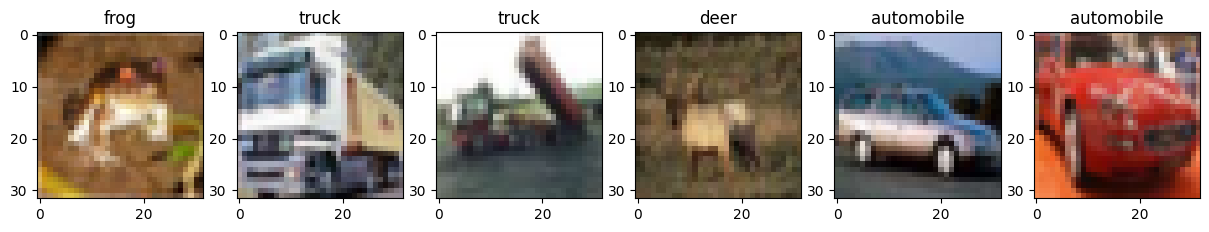

In [4]:
# Let's plot few images to see what they look like
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
for i in range(6):
    plt.subplot(1,6, i+1)
    img = images_train[i]
    label = labels_train[i][0]
    plt.imshow(img)
    plt.title(labels[label])

### (1.2) Image preprocesing


- normalize the pixels' intensities between 0 and 1
- turn the `labels_train` and `labels_test` into "one-hot-encoded" targets that we will call respectively `y_train` and `y_test`

In [5]:
### Normalizing pixels' intensities
X_train = images_train / 255.
X_train_small = images_train_small / 255.
X_test = images_test / 255.
X_test_small = images_test_small / 255.

### Encoding the labels
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(labels_train, 10)
y_train_small = to_categorical(labels_train_small, 10)
y_test = to_categorical(labels_test, 10)
y_test_small = to_categorical(labels_test_small, 10)

## (2) Iterate on a CNN architecture using a small training set

In [6]:
from tensorflow.keras import models, layers


In [7]:
def initialize_model():
    '''instanciate and return the CNN architecture of your choice with less than 150,000 params'''
    model = models.Sequential()

    model.add(layers.Conv2D(128, (4, 4), activation='relu', input_shape=(32, 32, 3), padding="same", strides =(1,1)))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides =(1,1)))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding="same", strides =(1,1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding="same", strides =(1,1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))

    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.2))

    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    return model


In [8]:
def compile_model(model):
    '''return a compiled model suited for the CIFAR-10 task'''
    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )
    return model

In [10]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(patience=30, restore_best_weights=True)

model=initialize_model()
model=compile_model(model)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
history = model.fit(
    X_train_small, y_train_small,
    epochs=1000,
    batch_size=64,
    validation_split=0.3,
    callbacks=[es]
)

Epoch 1/1000
55/55 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.1108 - loss: 2.2974 - val_accuracy: 0.1733 - val_loss: 2.2151
Epoch 2/1000
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.1730 - loss: 2.1829 - val_accuracy: 0.1927 - val_loss: 2.0926
Epoch 3/1000
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2174 - loss: 2.0436 - val_accuracy: 0.2587 - val_loss: 1.9412
Epoch 4/1000
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2594 - loss: 1.9156 - val_accuracy: 0.3147 - val_loss: 1.8719
Epoch 5/1000
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3110 - loss: 1.8414 - val_accuracy: 0.3087 - val_loss: 1.8665
Epoch 6/1000
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3142 - loss: 1.7971 - val_accuracy: 0.3507 - val_loss: 1.7173
Epoch 7/1000
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3371 - loss: 1.7398 - val_accuracy: 0.3787 - val_loss: 1.6800
Epoch 8/1000
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3568 - loss: 1.7229 - val_accura

**Question: History of your training**



In [12]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label = 'train' + exp_name)
    ax1.plot(history.history['val_loss'], label = 'val' + exp_name)
    ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

(<Axes: title={'center': 'loss'}>, <Axes: title={'center': 'Accuracy'}>)

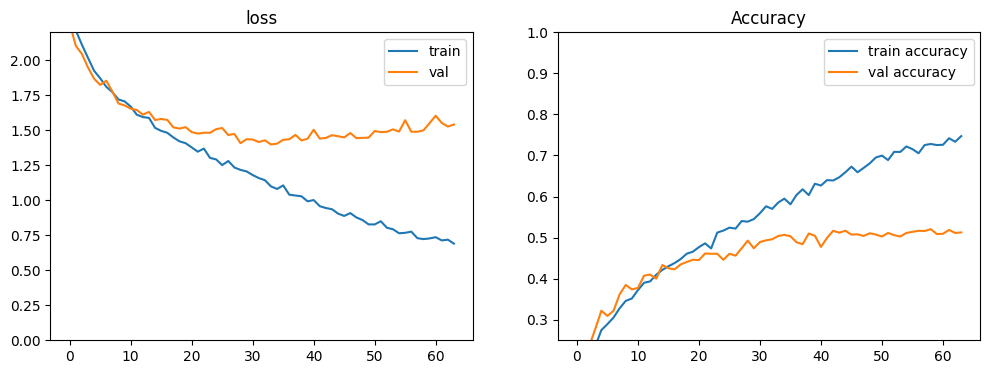

In [ ]:
plot_history(history)

 **Question: Evaluating your CNN**

* Evaluate your model on the test data and compare it with a baseline accuracy.


In [13]:
model.evaluate(X_test_small, y_test_small)

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5273 - loss: 1.3067


[1.3303747177124023, 0.5289999842643738]

## (3) Data augmentation

*  <b><u>Data Augmentation</u></b>
    * This technique is widely-used and consists of applying little transformations to the input images without changing their labels: ***mirroring***, ***cropping***, ***intensity changes***, etc...
    * The _improved performance_ simply results from the CNN training with more images (the original pictures + the "augmented" ones).
   
    * When a Neural Network operates a forward/backward propagation, it requires to see only 16 pictures at a time if you chose $ batch size = 16 $ for example. It doesn't need to store all the original images or the augmented images in the RAM.
        1. Generate some `augmented data/images`
        2. Fit the model on the images and their augmented versions
        3. Delete the images and their augmented versions from the RAM
        4. Repeat steps 1-2-3
        
*  <a href= "https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator"><b><u>tf/keras/preprocessing/image/ImageDataGenerator</u></b></a>

**Question: using an ImageDataGenerator**
Look at the following code down below 👇
* The general syntax may look strange but don't worry:
    * First, focus on the arguments of the *ImageDataGenerator* which define the augmentation techniques that we are using
    * Then, check the <a href="https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator">**`ImageDataGenerator`**</a> documentation later


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center = False,
    featurewise_std_normalization = False,
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    zoom_range = (0.8, 1.2),
    )

datagen.fit(X_train)
datagen

In [15]:
X_augmented_iterator = datagen.flow(X_train, shuffle=False, batch_size=1)
X_augmented_iterator

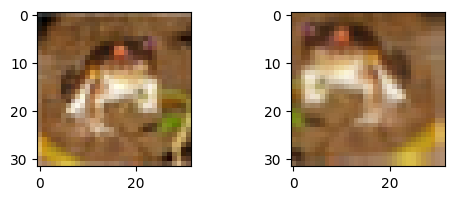

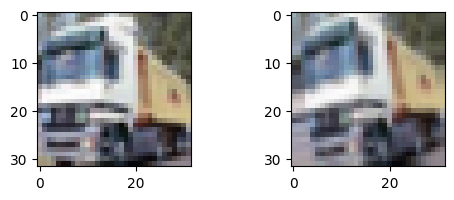

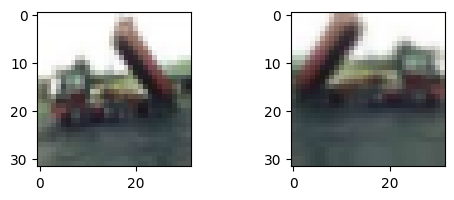

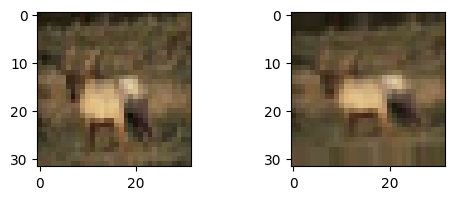

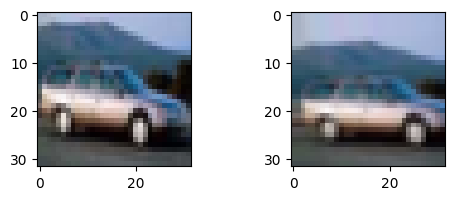

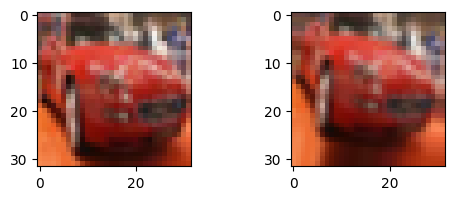

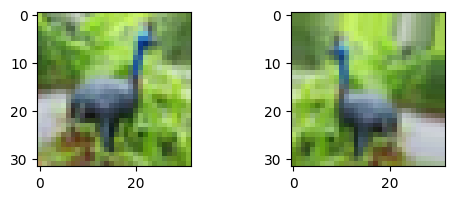

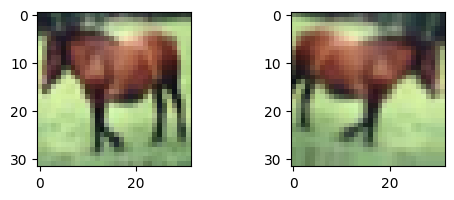

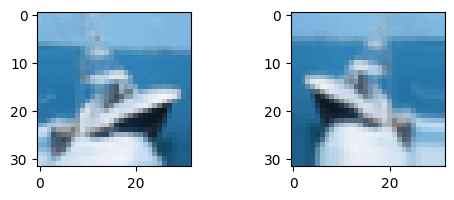

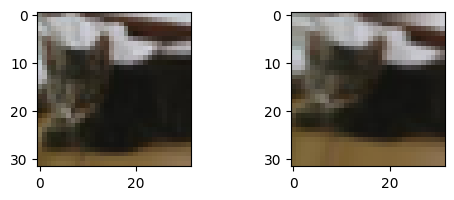

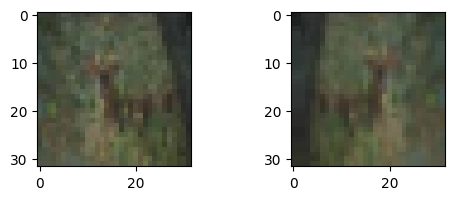

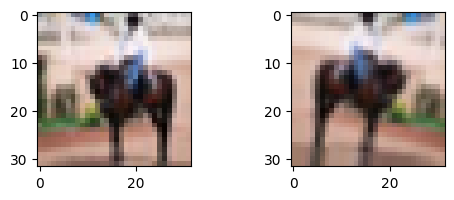

In [16]:
import numpy as np

for i, (raw_image, augmented_image) in enumerate(zip(X_train, X_augmented_iterator)):
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 2))
    ax1.imshow(raw_image)
    ax2.imshow(augmented_image[0])
    plt.show()

    if i > 10:
        break

 **Question: what is the validation set when we have augmented images**

* It is not possible to use this kind of Train/Val Split here as **using an image in the training set and its transformation in the validation set is considered data leakage** !.


In [17]:
from tensorflow.keras.callbacks import EarlyStopping

# The model
model_aug = initialize_model()
model_aug = compile_model(model_aug)

# The data generator
X_tr = X_train[:40000]
y_tr = y_train[:40000]
X_val = X_train[40000:]
y_val = y_train[40000:]
train_flow = datagen.flow(X_tr, y_tr, batch_size = 64)

# The early stopping criterion
es = EarlyStopping(patience = 3)

# The fit
history_aug = model_aug.fit(train_flow,
                        epochs = 50,
                        callbacks = [es],
                        validation_data = (X_val, y_val))


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 41ms/step - accuracy: 0.1878 - loss: 2.1286 - val_accuracy: 0.3778 - val_loss: 1.6787
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.3693 - loss: 1.7083 - val_accuracy: 0.4674 - val_loss: 1.4456
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.4247 - loss: 1.5666 - val_accuracy: 0.4947 - val_loss: 1.3795
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.4563 - loss: 1.4785 - val_accuracy: 0.5418 - val_loss: 1.2582
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 39ms/step - accuracy: 0.4936 - loss: 1.4011 - val_accuracy: 0.5614 - val_loss: 1.2105
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.5028 - loss: 1.3769 - val_accuracy: 0.5708 - val_loss: 1.1742
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.5181 - loss: 1.3298 - val_accuracy: 0.5583 - val_loss: 1.2251
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 39ms/step - accuracy: 0.5217 - loss: 1.3282 - val_accurac

 **Question: How did the model with an augmented dataset perform?**



(<Axes: title={'center': 'loss'}>, <Axes: title={'center': 'Accuracy'}>)

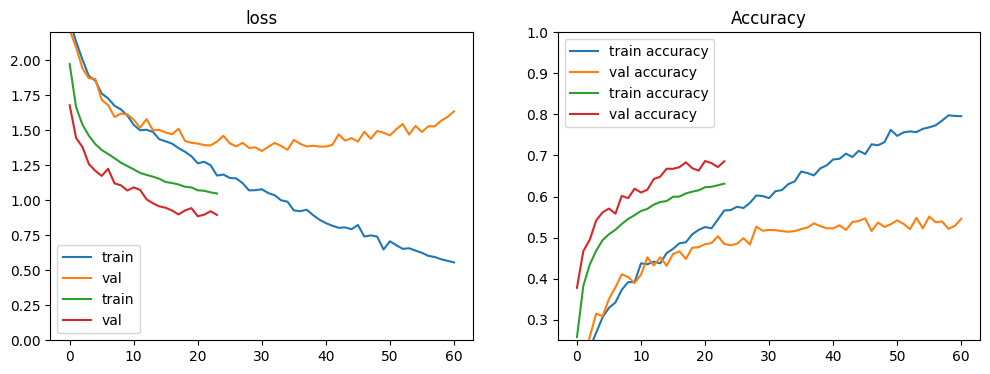

In [18]:
plot_history(history_aug, axs=plot_history(history, title='Baseline'))